# Visualizing Popular Games on Steam

Generally, the first code cell is where you import all the libraries your program needs. 

If you need to install a package you can do so inside your notebook! This is a very convenient feature of notebooks. The below cell demonstrates how to install pandas into your conda envirnment. Since this is a demo, I commented out the statement that would install pandas, just in case you don't want to install it locally right now. Simply uncomment the statement to install pandas if desired. 

In [8]:
# !pip install pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
# load the Steam Video Games dataset into a pandas dataframe
path_steam200K = './datasets/steam-200k.csv'
columns = ['user_id', 'game', 'behavior', 'hours', '0']
steam200k = pd.read_csv(path_steam200K, names=columns)
steam200k.head()

,user_id,game,behavior,hours,0
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


Great, let's visualize the number of rows associated with a behavior, which is can be either purchase or play.

In [3]:
# quickly check the unique value counts in the behavior column
steam200k['behavior'].value_counts() 

purchase    129511
play         70489
Name: behavior, dtype: int64

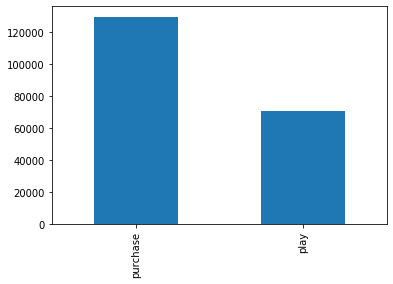

In [4]:
# make a bar plot
steam200k['behavior'].value_counts().plot(kind='bar')

This isn't a very pretty bar chart, but it was very easy to create and allows us to learn a lot about the data without much effort on our end. However, if we want to make a nice visualization we can! There are a number of graphing libraries we could choose from (`plotly`, `seaborn`, `ggplot`, etc.), each one has it's pros and cons. Plotly allows you to make interactive embedded visualizations, but it isn't easy to set up. For this tutorial, I'll use the awesome `seaborn` library to spruce up our visualizations. Note, if you wanted to use `plotly` and are using the newer `jupyter lab` command to start your local notebook server (hopefully you are) instead of the traditional `jupyter notebook` command, you may need to add a few jupyter lab extension before plotly can be displayed in your notebooks. The command you need is in the following cell. Warning, the code may yell at you if you haven't installed node.js yet. If this is the case, follow the link they provide in the error message to install node.js locally. P.S. I know getting your environment set up can be frustrating, but hang in there, this is basically as bad as it gets. It's smooth sailing afterwards.  

In [5]:
# !jupyter labextension install jupyterlab-plotly

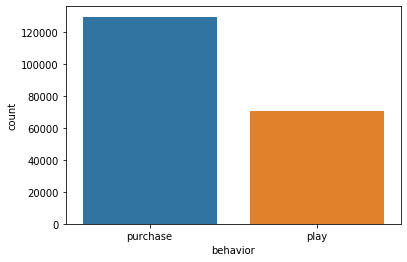

In [9]:
# remember we imported seaborn as sns at the top of our notebook
ax = sns.countplot(x="behavior", data=steam200k)

Now lets visualize the game counts

In [13]:
# quickly check the value counts and number of unique games
steam200k['game'].value_counts()

Dota 2                                   9682
Team Fortress 2                          4646
Counter-Strike Global Offensive          2789
Unturned                                 2632
Left 4 Dead 2                            1752
                                         ... 
Pirates vs Corsairs Davy Jones's Gold       1
The Talos Principle - Soundtrack            1
Siralim                                     1
In Exilium                                  1
Ironclads High Seas                         1
Name: game, Length: 5155, dtype: int64

5155 is a lot of unique games! It doesn't make much sense to plot all of them (most of the games probably have fewer than 10 entries in our data). One solution is to visualize only the top 20 games rather than all 5155. 

In [17]:
# need to get the names of the top 20 games so we can filter our dataframe
top20game_names = steam200k['game'].value_counts().nlargest(20).index

# filter the dataframe
top20 = steam200k.loc[steam200k['game'].isin(top20game_names), :].reset_index(drop=True)
top20.head()

,user_id,game,behavior,hours,0
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Left 4 Dead 2,purchase,1.0,0
3,151603712,Left 4 Dead 2,play,8.9,0
4,151603712,Team Fortress 2,purchase,1.0,0


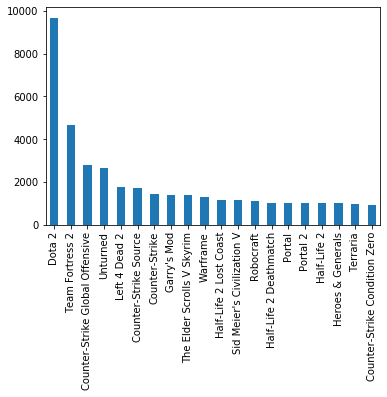

In [19]:
# now we can make our bar chart
top20.game.value_counts().plot(kind='bar')

Cool...but I have to tilt my head sideways to read the game titles easily. Let's make our bar chart easier to read by turning it into a horizontal bar chart. 

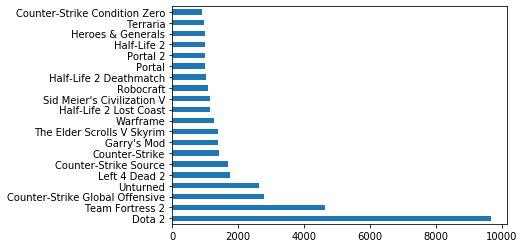

In [20]:
top20.game.value_counts().plot(kind='barh')

Easy right! Thanks to `pandas` and `matplotlib` we can quickly and easily visualize our data! Below is a nicer version of the previous horizontal bar chart using seaborn. 